# Yuki Isomura


## Does Remote Working Provide a Positive Impact on Their Salary? 

Sub Questions:

- To what extent of workers' experience level, does remote working affect positively? 
- In what type of jobs, does remote working affect positively? 
- In which region, does remote working affect positively?  


Due to the global pandemic, the benefit of remote working is recognized. However, recent research implies that successive rate and productivity with remote working depends on the skills of individual workers. In this research project, I will analyze the ratio of remote working, workers' level of skills, area of the profession, company size, and their location and compare them by salary based on the assumption that more salary means better success in their jobs. In general, salary is not an absolute criterion of success. But as there are a limited number of criteria in this dataset, I state the salary as a clear criterion of success in their jobs.

In [234]:
#load file
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw/ds_salaries.csv', header=1)
df = df.drop(columns='Unnamed: 0')

df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [235]:
df1 = df.loc[:,["experience_level","employment_type","job_title","salary_in_usd","employee_residence","remote_ratio","company_location"]]
df1 = df1.rename(columns = {'salary_in_usd':'salary'})
df1 # droped columns that are not used 

,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location
0,MI,FT,Data Scientist,79833,DE,0,DE
1,SE,FT,Machine Learning Scientist,260000,JP,0,JP
2,SE,FT,Big Data Engineer,109024,GB,50,GB
3,MI,FT,Product Data Analyst,20000,HN,0,HN
4,SE,FT,Machine Learning Engineer,150000,US,50,US
...,...,...,...,...,...,...,...
602,SE,FT,Data Engineer,154000,US,100,US
603,SE,FT,Data Engineer,126000,US,100,US
604,SE,FT,Data Analyst,129000,US,0,US
605,SE,FT,Data Analyst,150000,US,100,US


## Q1, Does Remote Working Provide a Positive Impact on Their Salary?

[Text(0.5, 1.0, 'Salary Distribution by Ratio of Remote Working'),
 Text(0.5, 0, 'Ratio of Remote Working'),
 Text(0, 0.5, 'Salary (USD)')]

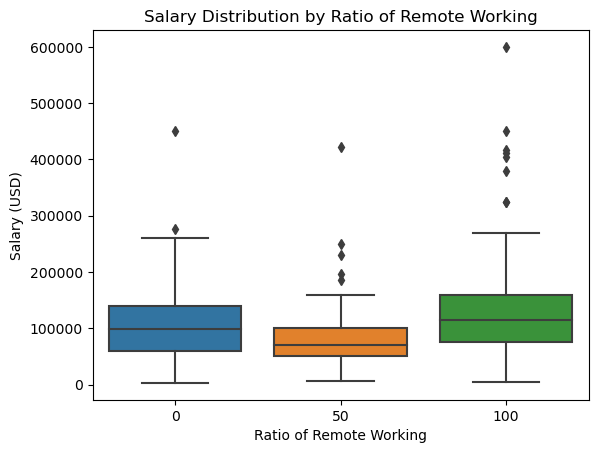

In [349]:
sns.boxplot(data = df1, x="remote_ratio", y= "salary").set(title = 'Salary Distribution by Ratio of Remote Working', xlabel = 'Ratio of Remote Working', ylabel = 'Salary (USD)')

### Analysis 1.0

Based on the plot above, it is the worst to do the combined use of remote and in-person working. Full in-person working and full remote working does not have much difference.   
In the analysis 2-4, I want to investigate whether this is consistent for any conditions.   
So far, the answer to the research question is that shifting from in-person working to remote working does not provide a benefit in terms of salary and it might give a negative impact for the incomplete shifting in the general data science job field. 

## Q2, To what extent of workers' experience level, does remote working affect positively? 

[Text(0.5, 1.0, 'Salary Distribution by Experience Level for Different Ratio of Remote Working'),
 Text(0.5, 0, 'Experience Level of Workers'),
 Text(0, 0.5, 'Salary (USD)')]

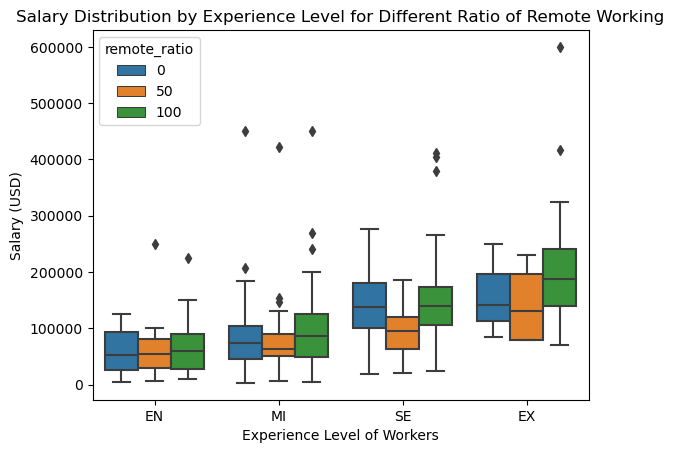

In [350]:
# EN...Entry-level, MI...Mid-level, SE...Senior-level, EX...Executive-level
sns.boxplot(data = df1, x="experience_level", y= "salary", hue = "remote_ratio", order = ['EN','MI','SE','EX']).set(title = 'Salary Distribution by Experience Level for Different Ratio of Remote Working', xlabel = 'Experience Level of Workers', ylabel = 'Salary (USD)')

### Analysis 2.0

First of all, in any experience level, the combined use of in-person and remote working provided the worst productivity. This result is consistent from Analysis 1.0. In addition to it, as the experience level goes higher, the difference in salary of remote ratio of 50% and 100% gets bigger.    
However, differences in full in-person working and full remote working are not small for Executive-level experienced workers. There is an obvious advantage in remote working for them.    

## Q3, In what type of jobs, does remote working affect positively? 

In [345]:
df_job_count = df1.groupby('job_title').count().rename(columns = {'experience_level':'count'}).sort_values('count',ascending = False).iloc[:,:1].reset_index()
df_job_count[df_job_count['count'] > 10]

,job_title,count
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16
5,Data Science Manager,12
6,Data Architect,11


Since it is difficult to categorize jobs into a few groups without knowing their precise duties, I will pick a few jobs that have a certain number of workers to avoid lack of data and compare them by plot.    
Based on the chart above, Data Scientist, Data Engineer, Data Analyst, Machine Learning Engineer, Research Scientist, Data Science Manager, and Data Architect have more than 10 workers.    

In [239]:
df_popular_jobs = df1[df1['job_title'].isin(['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer', 'Research Scientist', 'Data Science Manager', 'Data Architect'])].reset_index(drop = True)
df_popular_jobs # df1 only with Data Scientist, Data Engineer, Data Analyst, Machine Learning Engineer, Research Scientist, Data Science Manager, and Data Architect.  

,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location
0,MI,FT,Data Scientist,79833,DE,0,DE
1,SE,FT,Machine Learning Engineer,150000,US,50,US
2,EN,FT,Data Analyst,72000,US,100,US
3,MI,FT,Data Scientist,35735,HU,50,HU
4,EN,FT,Data Scientist,51321,FR,0,FR
...,...,...,...,...,...,...,...
447,EN,FT,Data Analyst,52000,CA,0,CA
448,SE,FT,Data Engineer,154000,US,100,US
449,SE,FT,Data Engineer,126000,US,100,US
450,SE,FT,Data Analyst,129000,US,0,US


[Text(0.5, 1.0, 'Salary Distribution by Jobs for Different Ratio of Remote Working'),
 Text(0.5, 0, 'Salary (USD)'),
 Text(0, 0.5, 'Job Title')]

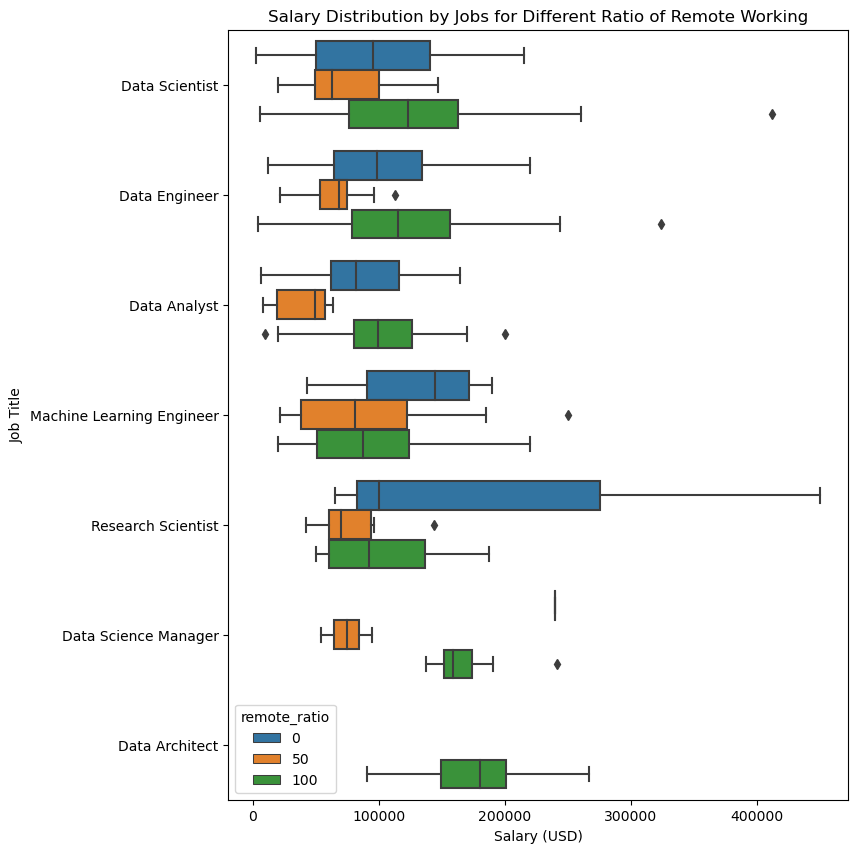

In [351]:
plt.figure(figsize=(8, 10))
sns.boxplot(data = df_popular_jobs, x="salary", y= "job_title", hue = 'remote_ratio', order = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer', 'Research Scientist', 'Data Science Manager', 'Data Architect']).set(title = 'Salary Distribution by Jobs for Different Ratio of Remote Working', xlabel = 'Salary (USD)', ylabel = 'Job Title')

### Analysis 3.0

Based on the plot above, the utility of remote working differs by jobs. As Data Scientist, Data Engineer, and Data Analyst are similar jobs, the distributions are very similar. They also occupy `(143+132+97) / 607 = 61.29%` of the total amount of data, therefore, the shapes of the plot are homogeneous as the plot in Analysis 1.    
On the other hand, Machine Learning Engineer, Research Scientist and Data Science Manager have a property that full in-person working provides better advantages than full remote working, which is inconsistent from Analysis 1. But we need to note that those jobs have relatively little data.    
In Data Architect, due to the lack of data, all the workers belong to full remote working, thus, it is not possible to evaluate its effectiveness.    
Overall, it can be said that validity of remote working varies by the jobs but it is not easy or impossible to find the similarities due to the limited sources.    

## Q4, In which region, does remote working affect positively?

In [321]:
df_country_code = pd.DataFrame({'code':np.sort(df1['company_location'].unique()).tolist(),
                                'country':['United Arab Emirates','American Samoa','Austria','Australia','Belgium','Brazil','Canada','Switzerland','Chile','China',
                                           'Colombia','Czech Republic','Germany','Denmark','Algeria','Estonia','Spain','France','United Kingdom','Greece',
                                           'Honduras','Croatia','Hungary','Ireland','Israel','India','Iraq','Iran','Italy','Japan',
                                           'Kenya','Luxembourg','Moldova','Malta','Mexico','Malaysia','Nigeria','Netherlands','New Zealand','Pakistan',
                                           'Poland','Portugal','Romania','Russia','Singapore','Slovenia','Turkey','Ukraine','United States','Vietnam'],
                                'region':['Middle East','Oceania','Europe','Oceania','Europe','Latin America','North America','Europe','Latin America','Asia',
                                           'Latin America','Europe','Europe','Europe','Africa','Europe','Europe','Europe','Europe','Europe',
                                           'Latin America','Europe','Europe','Europe','Middle East','Asia','Middle East','Middle East','Europe','Asia',
                                           'Africa','Europe','Europe','Europe','Latin America','Asia','Africa','Europe','Oceania','Asia',
                                           'Europe','Europe','Europe','Europe','Asia','Europe','Middle East','Europe','North America','Asia']
                               })
df_country_code # country categorized by region

,code,country,region
0,AE,United Arab Emirates,Middle East
1,AS,American Samoa,Oceania
2,AT,Austria,Europe
3,AU,Australia,Oceania
4,BE,Belgium,Europe
5,BR,Brazil,Latin America
6,CA,Canada,North America
7,CH,Switzerland,Europe
8,CL,Chile,Latin America
9,CN,China,Asia


In [327]:
# Add region information based on company location
df1['company_region'] = df1['company_location']
for i in range(0,len(df1)) : 
    for j in range(0,len(df_country_code)) :
        if(df1.loc[i,'company_region'] == df_country_code.loc[j,'code']) :
            df1.loc[i,'company_region'] = df_country_code.loc[j,'region'] 
    
df1

,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_region
0,MI,FT,Data Scientist,79833,DE,0,DE,Europe
1,SE,FT,Machine Learning Scientist,260000,JP,0,JP,Asia
2,SE,FT,Big Data Engineer,109024,GB,50,GB,Europe
3,MI,FT,Product Data Analyst,20000,HN,0,HN,Latin America
4,SE,FT,Machine Learning Engineer,150000,US,50,US,North America
...,...,...,...,...,...,...,...,...
602,SE,FT,Data Engineer,154000,US,100,US,North America
603,SE,FT,Data Engineer,126000,US,100,US,North America
604,SE,FT,Data Analyst,129000,US,0,US,North America
605,SE,FT,Data Analyst,150000,US,100,US,North America


In [347]:
df_region_count = df1.groupby('company_region').count().rename(columns = {'experience_level':'count'}).sort_values('count',ascending = False).iloc[:,:1].reset_index()
df_region_count

,company_region,count
0,North America,385
1,Europe,157
2,Asia,38
3,Latin America,9
4,Middle East,9
5,Oceania,5
6,Africa,4


[Text(0.5, 1.0, 'Salary Distribution by Region for Different Ratio of Remote Working'),
 Text(0.5, 0, 'Salary (USD)'),
 Text(0, 0.5, 'Region of Company')]

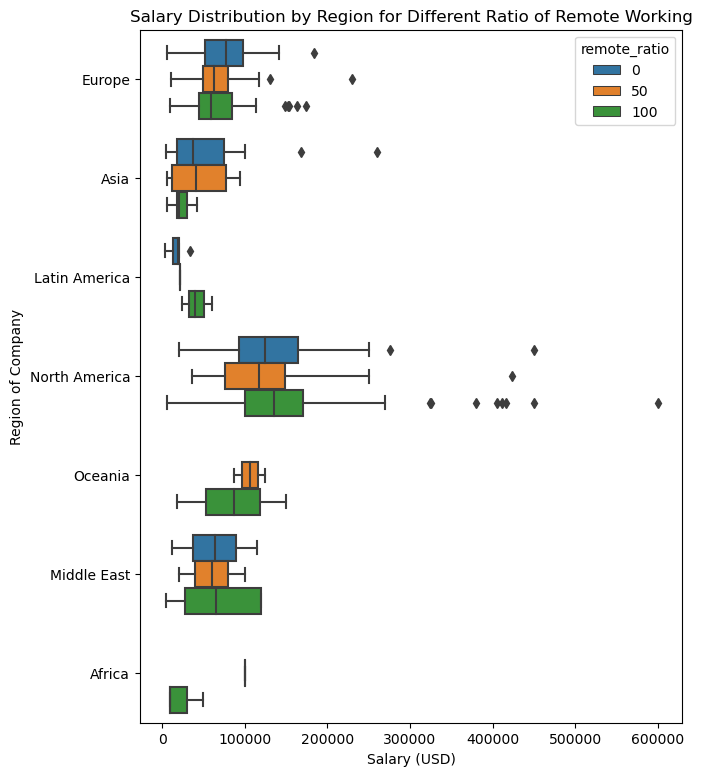

In [352]:
plt.figure(figsize=(7, 9))
sns.boxplot(data = df1, x="salary", y= "company_region", hue = 'remote_ratio').set(title = 'Salary Distribution by Region for Different Ratio of Remote Working', xlabel = 'Salary (USD)', ylabel = 'Region of Company')


### Analysis 4.0

Based on the plot above, it can be stated that validity of remote working is very unique to the region. In Europe and North America, the shape of the plots are very similar to Analysis 1. Combined use of in-person and remote working provides the worst productivity, and full in-person and full remote working do not have much difference. But we need to note that this is happening because the sum of them occupies `(157+385)/607 = 89.29%` of the total data.    
On the other hand, in Asia, full in-person working and combined use of in-person and remote working have better effectiveness than full remote working to a huge extent. It is not possible to analyze the cause of this phenomenon but it is an interesting property that is worth noting.    
In other remaining regions, the data are not accurate enough to analyze due to the lack of data.   

### Analysis 1.1

Now I am back to Analysis 1.  
In summary of Analysis 2-4, workers tend to be productive when their working style is fully in-person or fully remote and be less productive when combined. This tendency is strongly applied to Entry to Senior-level of workers, regular data analysts, and workers in North American or European regions. However there are a few exceptional conditions. Executive-level workers tend to be better successful in fully remote working than fully in-person. Asian workers greatly impair　productivity in full remote working. Effectiveness of remote working differs by job type so much. 

# Next Analysis Plan

Through this EDA, I came up with other research questions that are related to remote working. The questions I will add in the next milestone are the following.
- How has the salary versus remote working changed over the time?
- Is there any difference in effectiveness of remote working when the company location and employee's residence are the same and different?   

The first question is about the transition of salary over time. Remote working has spread out exponentially when COVID-19 hit us. I assume that people were not used to the remote working at the time it started. Thus, it is worth researching how it has changed over the years.   
The second question is about international working. One thing I need to remember due to the limitation of this dataset is that even if the employees were living within the same country as the company location, it does not necessarily mean they are living within a small distance from their office. 

In addition, in this EDA, I could not break jobs into multiple groups based on their job type. So in the next milestone, I would like to research about each job and categorize them into some groups if I had time. 